In [9]:
# !pip install git+https://github.com/scverse/spatialdata
# !pip install git+https://github.com/scverse/spatialdata-plot

In [13]:
# !pip install --upgrade pandas --user

In [3]:
# !pip uninstall vpt

In [2]:
# !pip install --upgrade dask

In [5]:
import math

import matplotlib.pyplot as plt
import spatialdata_plot
from spatialdata.datasets import raccoon
from spatialdata.transformations import (
    Affine,
    Identity,
    MapAxis,
    Scale,
    Sequence,
    Translation,
    get_transformation,
    get_transformation_between_coordinate_systems,
    set_transformation,
)

Following this [tutorial](https://spatialdata.scverse.org/en/latest/tutorials/notebooks/notebooks/examples/transformations.html)

In [9]:
import spatialdata

In [17]:
sdata = spatialdata.datasets.raccoon()

INFO     Transposing `data` of type: <class 'dask.array.core.Array'> to ('c', 'y', 'x').                           


In [19]:
print(sdata)

SpatialData object with:
├── Images
│     └── 'raccoon': SpatialImage[cyx] (3, 768, 1024)
├── Labels
│     └── 'segmentation': SpatialImage[yx] (768, 1024)
└── Shapes
      └── 'circles': GeoDataFrame shape: (4, 2) (2D shapes)
with coordinate systems:
▸ 'global', with elements:
        raccoon (Images), segmentation (Labels), circles (Shapes)


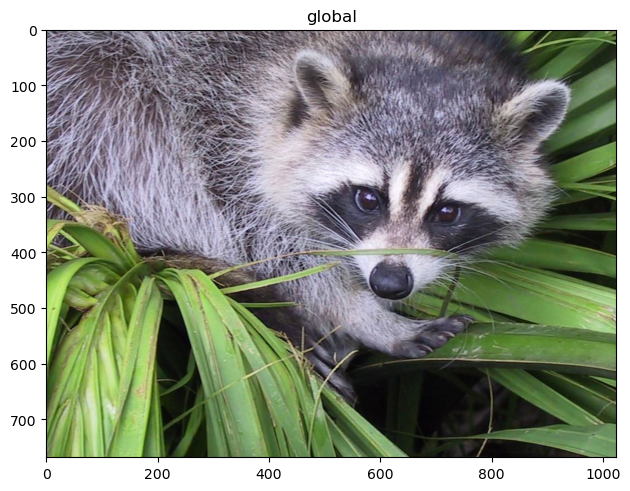

In [21]:
sdata.pl.render_images().pl.show()

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


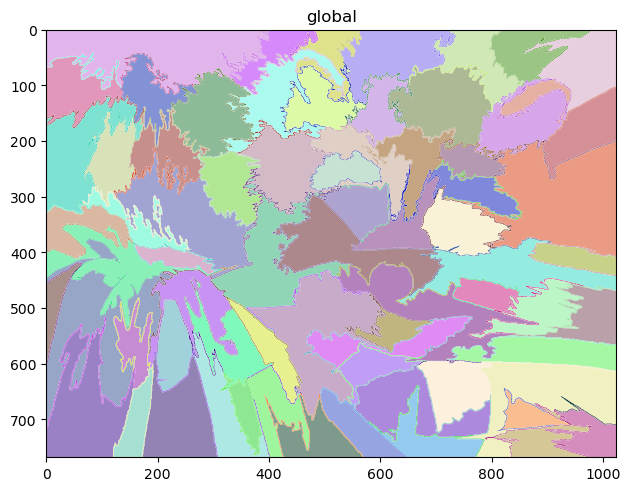

In [22]:
sdata.pl.render_labels().pl.show()

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


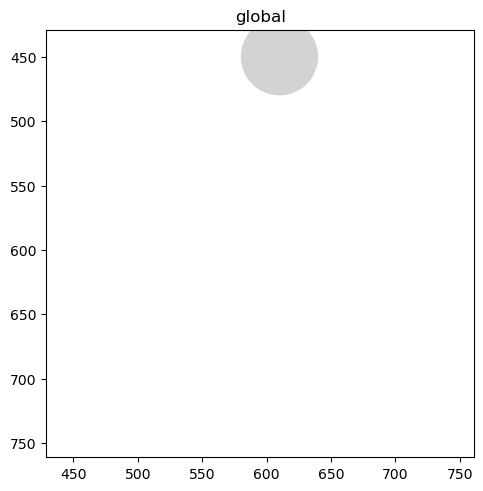

In [25]:
sdata.pl.render_shapes().pl.show()

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


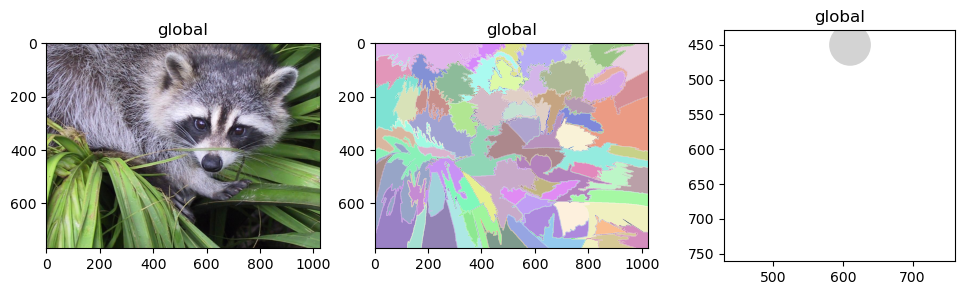

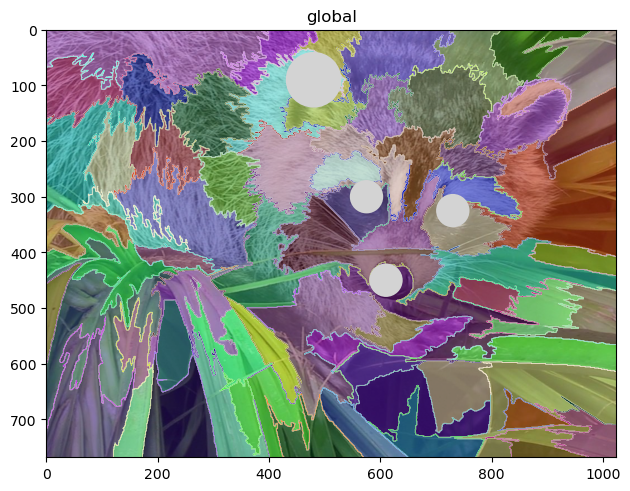

In [27]:
fig, axs = plt.subplots(ncols = 3, figsize = (12,3))

sdata.pl.render_images().pl.show(ax=axs[0])
sdata.pl.render_labels().pl.show(ax=axs[1])
sdata.pl.render_shapes().pl.show(ax=axs[2])

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

In [28]:
print(sdata.coordinate_systems)
print(
    get_transformation(sdata.images["raccoon"]),
    get_transformation(sdata.labels["segmentation"]),
    get_transformation(sdata.shapes["circles"]),
)

['global']
Identity  Identity  Identity 


C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


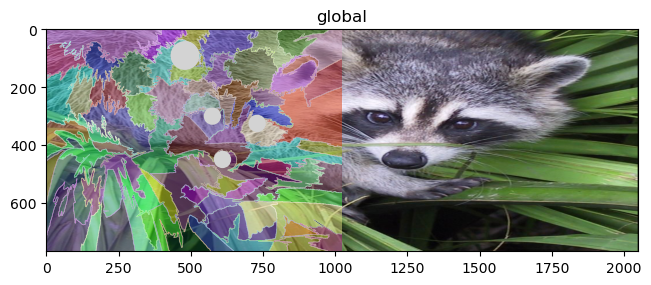

In [29]:
scale = Scale([2.0], axes=("x",))

set_transformation(sdata.images["raccoon"], scale, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


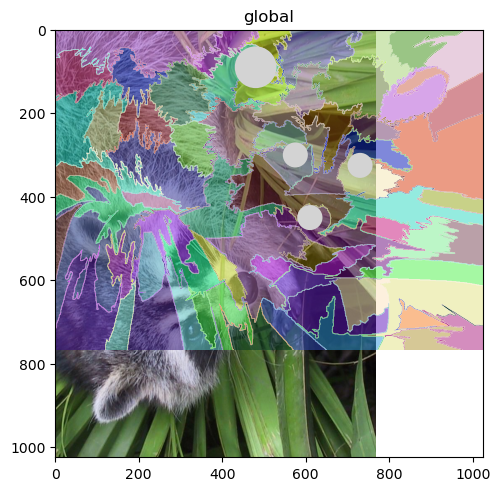

In [30]:
map_axis = MapAxis({"x": "y", "y": "x"})

set_transformation(sdata.images["raccoon"], map_axis, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


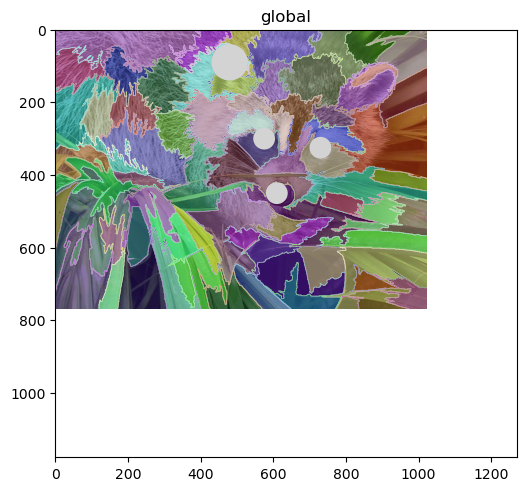

In [31]:
theta = math.pi / 6
rotation = Affine(
    [
        [math.cos(theta), -math.sin(theta), 0],
        [math.sin(theta), math.cos(theta), 0],
        [0, 0, 1],
    ],
    input_axes=("x", "y"),
    output_axes=("x", "y"),
)

set_transformation(sdata.images["raccoon"], rotation, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


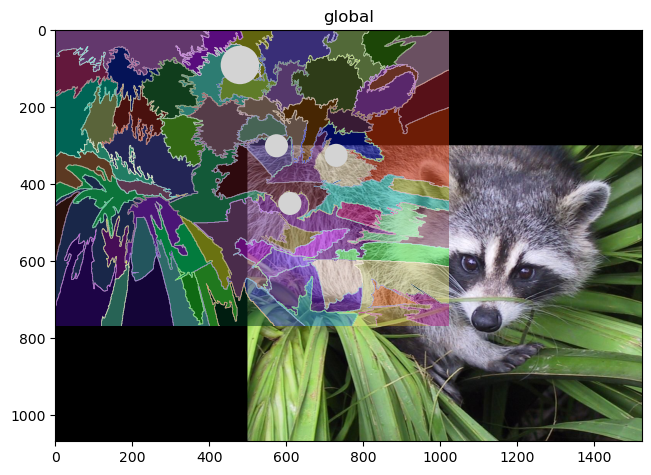

In [32]:
translation = Translation([500, 300], axes=("x", "y"))

set_transformation(sdata.images["raccoon"], translation, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


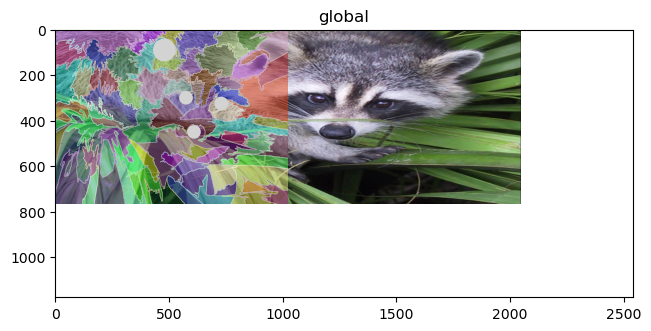

In [33]:
sequence = Sequence([rotation, scale])

set_transformation(sdata.images["raccoon"], sequence, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

In [34]:
print(sequence.to_affine_matrix(input_axes=("x", "y"), output_axes=("x", "y")))

[[ 1.73205081 -1.          0.        ]
 [ 0.5         0.8660254   0.        ]
 [ 0.          0.          1.        ]]


WARNING  The transformation matrix is not isotropic, the radius will be scaled by the average of the eigenvalues of
         the affine transformation matrix                                                                          


C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


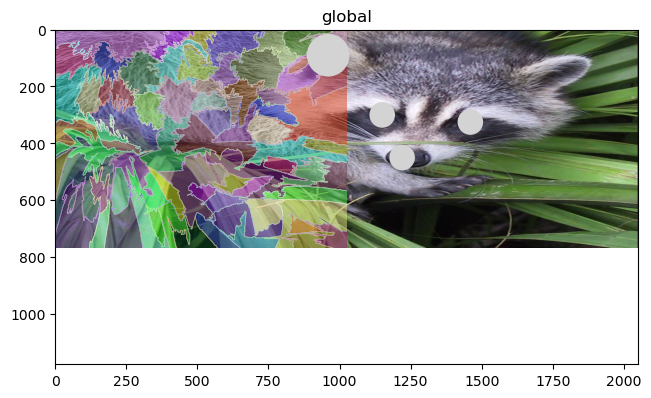

In [35]:
set_transformation(sdata.images["raccoon"], scale, to_coordinate_system="global")
set_transformation(sdata.shapes["circles"], scale, to_coordinate_system="global")
set_transformation(sdata.labels["segmentation"], rotation, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

WARNING  The transformation matrix is not isotropic, the radius will be scaled by the average of the eigenvalues of
         the affine transformation matrix                                                                          


C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\DouglasHannumJr\AppData\Roaming\Python\Python310\site-packages\anndata\_core\anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


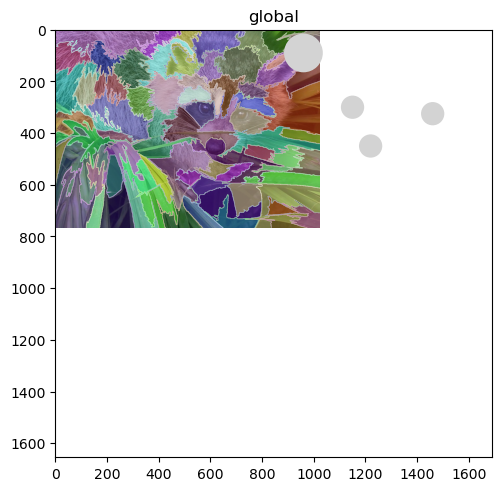

In [36]:
sequence = Sequence([rotation, rotation.inverse(), scale, scale.inverse()])

set_transformation(sdata.images["raccoon"], sequence, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

In [37]:
set_transformation(sdata.images["raccoon"], rotation)
print(get_transformation_between_coordinate_systems(sdata, sdata.images["raccoon"], "global"))
print(get_transformation_between_coordinate_systems(sdata, "global", sdata.images["raccoon"]))

Sequence 
    Affine (x, y -> x, y)
        [ 0.8660254 -0.5        0.       ]
        [0.5       0.8660254 0.       ]
        [0. 0. 1.]
Sequence 
    Affine (x, y -> x, y)
        [0.8660254 0.5       0.       ]
        [-0.5        0.8660254  0.       ]
        [0. 0. 1.]


In [38]:
set_transformation(sdata.images["raccoon"], Identity(), "my_other_space0")
set_transformation(sdata.labels["segmentation"], Identity(), "my_other_space1")
print(get_transformation(sdata.images["raccoon"], get_all=True))
print(sdata.coordinate_systems)

{'global': Affine (x, y -> x, y)
    [ 0.8660254 -0.5        0.       ]
    [0.5       0.8660254 0.       ]
    [0. 0. 1.], 'my_other_space0': Identity }
['global', 'my_other_space1', 'my_other_space0']


In [39]:
get_transformation_between_coordinate_systems(sdata, "global", "my_other_space0")

Sequence 
    Affine (x, y -> x, y)
        [0.8660254 0.5       0.       ]
        [-0.5        0.8660254  0.       ]
        [0. 0. 1.]
    Identity 